<a href="https://colab.research.google.com/github/ckkoh/ckkoh/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1.Business understanding
-  Objectives
 In 2023, Singapore faced a significant challenge with telecommunication fraud. Despite telecommunications operators successfully blocking approximately 300 million scam calls, as reported by the Infocomm Media Development Authority (IMDA), Singapore still saw over 46,000 scam cases,  marking an eight-year rise in such incidents. This resulted in a substantial financial loss of S$651.8 million. The continuous increase in scam activities underscores the urgent need for more robust preventive measures.

 As a machine learning engineer at a leading telecommunications firm, you are tasked with developing machine learning models to classify phone calls as 'scam' or 'not scam'. You will utilise historical call data  to develop models that identify and learn from patterns associated with fraudulent activities, thereby enhancing the security of phone communications.
 Upon detecting a call as a potential scam, your models will facilitate the automatic triggering of an SMS warning to the user immediately. This proactive approach is designed to strengthen individual defences  against fraud, decrease the incidence of scam cases, and ultimately mitigate the financial losses  associated with these crimes.

 In your submission, you are expected to evaluate at least three suitable models for predicting whether a phone call is a scam call

 dataset
 https://techassessment.blob.core.windows.net/aiap17-assessment-data/aiap17-NAME-NRIC.zip

# 2. Data Understanding
- target col'Scam Call'

In [114]:
!pip install db-sqlite3


In [115]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math


# Create connection to DB
database = "calls.db"
conn = sql.connect('data/calls.db')
cursor = conn.cursor()

# Get the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
  print(table[0])

calls
tcalls


In [116]:
# SQL to dataframe
query = "SELECT * FROM calls"

df = pd.read_sql_query(query, conn)
df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam


In [117]:
df.tail()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
11995,496033,116,15,NaN,Unlikely,Yes,4,7,Voip,2023-05-03 14:32:00,Fully Charged,Not Scam
11996,730960,621,3,11.74,Suspicious,Yes,0,MM,Landline,2023-08-04 00:16:00,Fully Charged,Scam
11997,806410,-27,4,102.45,Suspicious,Yes,0,MM,Voip,2024-03-22 01:31:00,Not Charging,Scam
11998,481032,-127,9,NaN,Unlikely,Yes,0,1,Landline,2023-07-11 17:04:00,Charging,Not Scam
11999,507774,505,4,0.00,Unlikely,Yes,5,44,Telegram,2024-02-13 00:33:00,Charging,Not Scam


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      12000 non-null  int64  
 1   Call Duration           12000 non-null  int64  
 2   Call Frequency          12000 non-null  int64  
 3   Financial Loss          10597 non-null  float64
 4   Flagged by Carrier      12000 non-null  object 
 5   Is International        12000 non-null  object 
 6   Previous Contact Count  12000 non-null  int64  
 7   Country Prefix          12000 non-null  object 
 8   Call Type               12000 non-null  object 
 9   Timestamp               12000 non-null  object 
 10  Device Battery          12000 non-null  object 
 11  Scam Call               12000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


In [119]:
# to get a general feel the data using unique() method

for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

ID 10000 [947429 540498 434243 ... 588061 688726 879258]
Call Duration 986 [-719  116   29 -563  312 -120  590  575 -102   36 -573   31  283 -299
   33  545 -103  253 -251   35  339  262  290  319  476  570  627   37
  -42   25 -272   27 -113  334  -25  329  142 -574  126  129   48  -47
  -28  -34  132  598 -123  522  350 -291  597  642   90  300  109   41
  346  284 -276  110  318  306  127   43  -44   30   45   59  -50   44
   49  340  -46   28  -99 -675 -328  114  663 -342 -548  478  -39  311
   39 -298  -98 -273   24  -26   38  270  259  336 -281  117  130 -131
   51 -600   34  135  577  618 -122 -127  106  635  320 -310  260  348
  567  622  124  113   42  343  752 -613  128  638  610 -564  308   32
   50   26   94  112 -116  121 -666  357  -30  281  119  519  118  649
  323  122   53  554  105  292  125 -142  609  -35  -27  -33 -124  497
  250  347  304  330  580  123  604  120  297  349  578  288  520 -263
 -269  272 -128 -115  588  -31 -267  526  662  605   55 -329  134  538
  

In [120]:
# Summary Statistics

df.describe(include=['object'])

,Flagged by Carrier,Is International,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
count,12000,12000,12000,12000,12000,12000,12000
unique,3,2,7,6,9916,3,2
top,Unlikely,Yes,91,Mobile,2023-08-22 11:47:00,Not Charging,Not Scam
freq,9104,11156,2569,2982,6,4061,7554


# 3. Data Cleaning
- [Call Duration] [Financial Loss], abs values
- round up [Financial Loss] and convert datatype from float to int
- [Country Prefix] replace MM with '60'



In [121]:
# Make a copy of data before cleaning

clean_df = df.copy()

In [122]:
# Check for missing values

clean_df.isnull().sum()

ID                           0
Call Duration                0
Call Frequency               0
Financial Loss            1403
Flagged by Carrier           0
Is International             0
Previous Contact Count       0
Country Prefix               0
Call Type                    0
Timestamp                    0
Device Battery               0
Scam Call                    0
dtype: int64

<Figure size 2000x600 with 0 Axes>

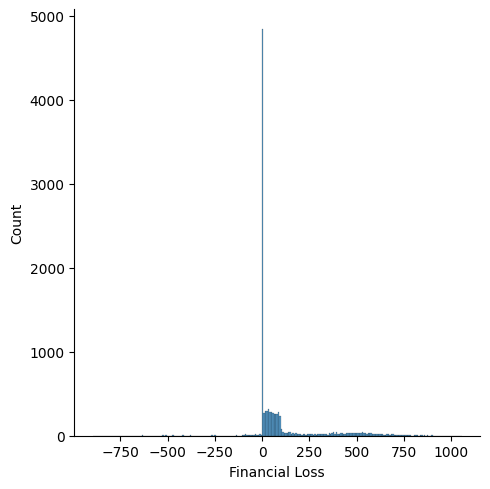

In [123]:
# Checking [Financial Loss]

plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Financial Loss")
plt.show()

In [124]:
# Fix neg values with abs

clean_df['Call Duration'] = clean_df['Call Duration'].abs()
clean_df['Financial Loss'] = clean_df['Financial Loss'].abs()


In [125]:
# Fixing Null vaules with '0'

clean_df['Financial Loss']=clean_df['Financial Loss'].fillna('0')

In [126]:
print(clean_df['Financial Loss'].isna())

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Name: Financial Loss, Length: 12000, dtype: bool


In [127]:
# Round the 'Financial Loss' columnm as Int

clean_df['Financial Loss'] = clean_df['Financial Loss'].astype(float).round().astype(int)


In [128]:
# Replace ['Country Prefix']('MM') with '60'

clean_df.loc[clean_df['Country Prefix'] == 'MM', 'Country Prefix'] = '60'

In [129]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12000 non-null  int64 
 1   Call Duration           12000 non-null  int64 
 2   Call Frequency          12000 non-null  int64 
 3   Financial Loss          12000 non-null  int64 
 4   Flagged by Carrier      12000 non-null  object
 5   Is International        12000 non-null  object
 6   Previous Contact Count  12000 non-null  int64 
 7   Country Prefix          12000 non-null  object
 8   Call Type               12000 non-null  object
 9   Timestamp               12000 non-null  object
 10  Device Battery          12000 non-null  object
 11  Scam Call               12000 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.1+ MB


In [130]:
for col in clean_df.columns:
  print(col, len(clean_df[col].unique()), clean_df[col].unique())

ID 10000 [947429 540498 434243 ... 588061 688726 879258]
Call Duration 572 [719 116  29 563 312 120 590 575 102  36 573  31 283 299  33 545 103 253
 251  35 339 262 290 319 476 570 627  37  42  25 272  27 113 334 329 142
 574 126 129  48  47  28  34 132 598 123 522 350 291 597 642  90 300 109
  41 346 284 276 110 318 306 127  43  44  30  45  59  50  49 340  46  99
 675 328 114 663 342 548 478  39 311 298  98 273  24  26  38 270 259 336
 281 117 130 131  51 600 135 577 618 122 106 635 320 310 260 348 567 622
 124 343 752 613 128 638 610 564 308  32  94 112 121 666 357 119 519 118
 649 323  53 554 105 292 125 609 497 250 347 304 330 580 604 297 349 578
 288 520 263 269 115 588 267 526 662 605  55 134 538 644 301 322 287 307
 356 541 556 569 279 493 617 614 621  40 293 603 331 679  23 277 136 278
 137 650 303 533 633 645 691  52 562 584 602 634 316 616 517 296 237 549
  95 589 332 275  84 314 108 665 713 327 630 502 593 313 274 140 239 647
 477 337 289 560  54 401 294 503 543  96 271 487 

# 4. Visualising Data

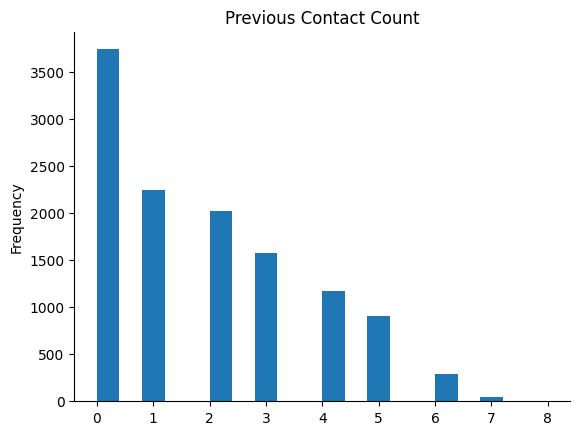

In [131]:
# Generating various historgram plot for visualisation , 'Previous Contact Count', 'Call Duration', 'Call Frequency', 'Financial Loss', 'Previous Contact Count'

clean_df['Previous Contact Count'].plot(kind='hist', bins=20, title='Previous Contact Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 2000x600 with 0 Axes>

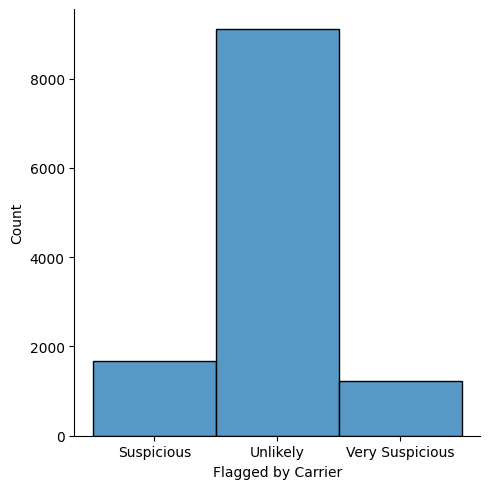

In [132]:
# Generating various distrubution plot for visualation, "Flagged by Carrier", "Is International", "Country Prefix", "Call Type", "Device Battery", "Scam Call"

plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Flagged by Carrier")
plt.show()

<Figure size 2000x600 with 0 Axes>

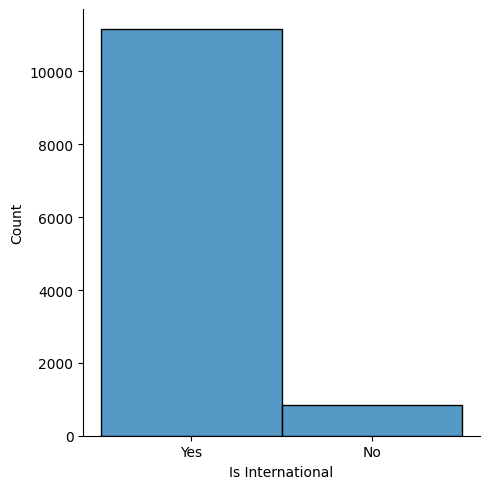

In [133]:
plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Is International")
plt.show()

<Figure size 2000x600 with 0 Axes>

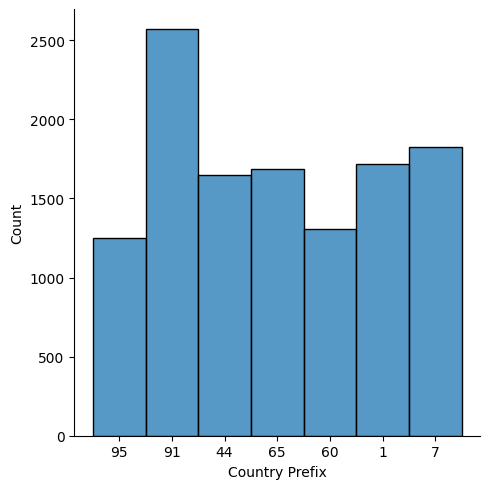

In [134]:
plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Country Prefix")
plt.show()

<Figure size 2000x600 with 0 Axes>

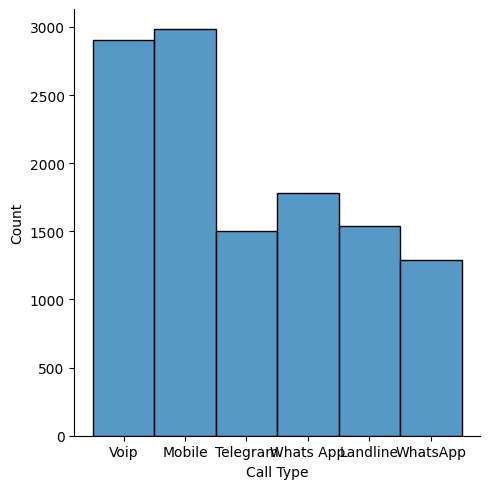

In [135]:
plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Call Type")
plt.show()

<Figure size 2000x600 with 0 Axes>

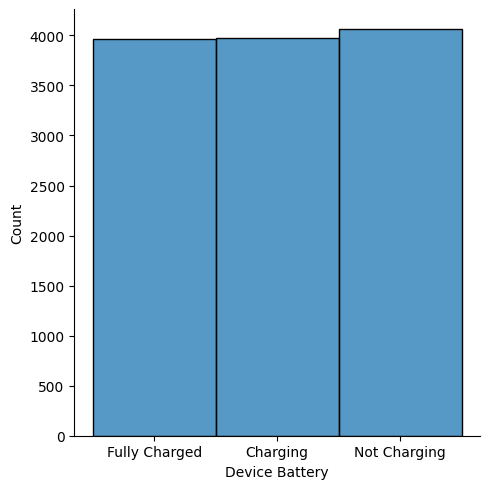

In [136]:
plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Device Battery")
plt.show()

<Figure size 2000x600 with 0 Axes>

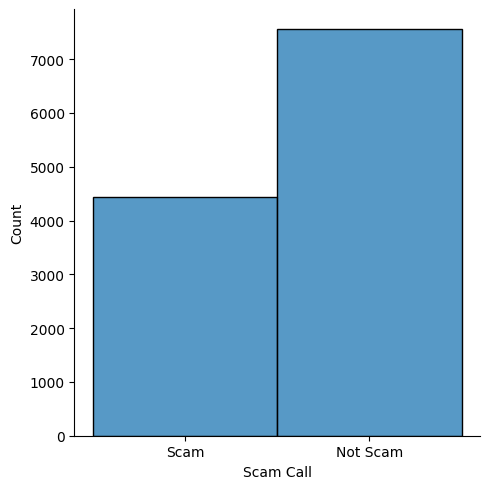

In [137]:
plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Scam Call")
plt.show()

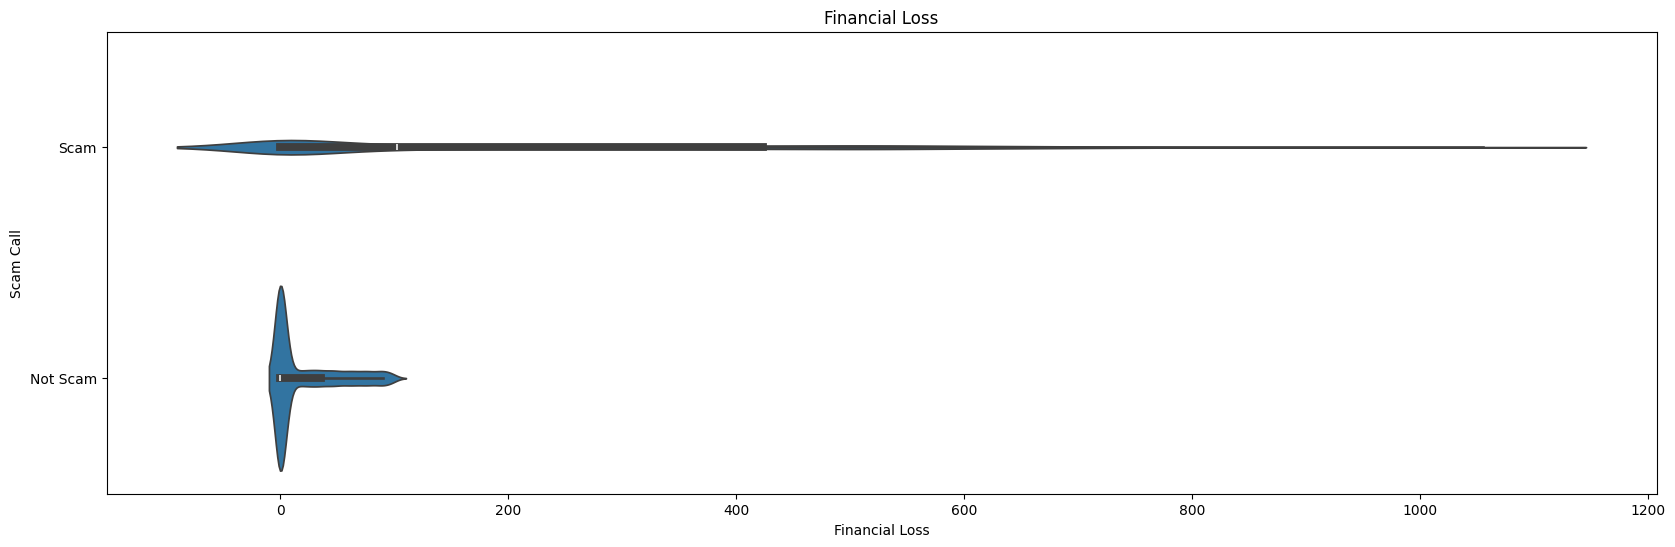

In [138]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Financial Loss', y="Scam Call", data=clean_df).set_title("Financial Loss")
plt.show()

<Axes: xlabel='Device Battery', ylabel='Scam Call'>

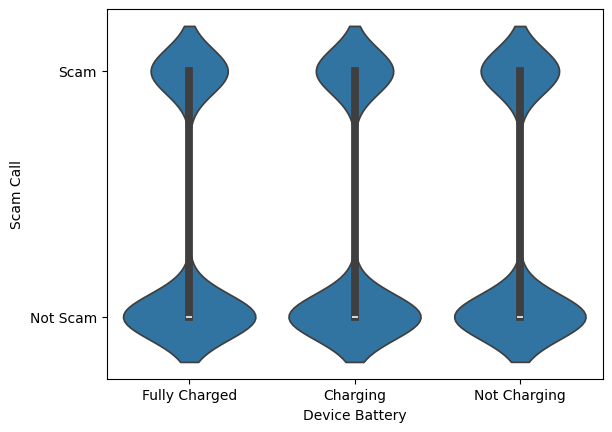

In [139]:
# Generating various violin plot for object visualisation vs Scam, 'Flagged by Carrier', 'Is International', 'Previous Contact Count', 'Country Prefix' , 'Call Type', 'Device Battery'
# no feature found

sns.violinplot(x='Device Battery', y='Scam Call', data=clean_df)

<Figure size 1400x1400 with 0 Axes>

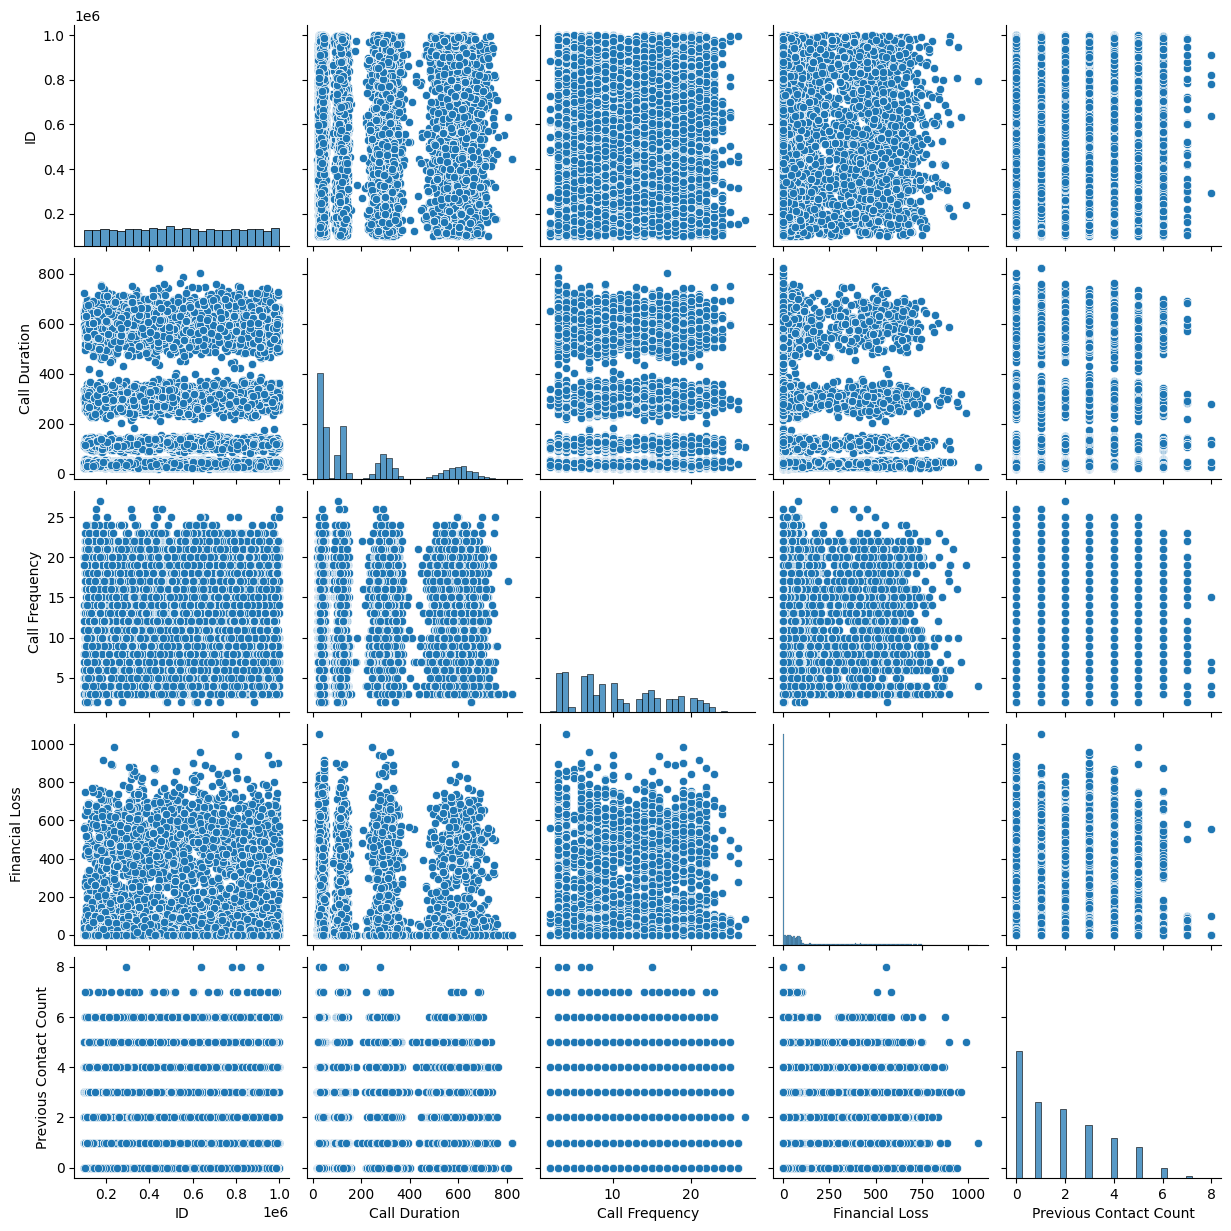

In [140]:
# Visualing dataframe

plt.figure(figsize=(14, 14))
sns.pairplot(clean_df)
plt.show()

In [141]:
clean_df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,719,12,42,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,30,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,563,4,64,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam


# 5 Preparing Data
- Creating additional col for Timestamp

In [142]:
# Create new day and time column from timestamp column

clean_df['Date'] = pd.to_datetime(clean_df['Timestamp']).dt.day
clean_df['Day'] = pd.to_datetime(clean_df['Timestamp']).dt.dayofweek
clean_df['Hour'] = pd.to_datetime(clean_df['Timestamp']).dt.hour
clean_df['Month'] = pd.to_datetime(clean_df['Timestamp']).dt.month
clean_df['Odd Date'] = pd.to_datetime(clean_df['Timestamp']).dt.day%2!=0
clean_df['Odd Day'] = pd.to_datetime(clean_df['Timestamp']).dt.dayofweek%2!=0


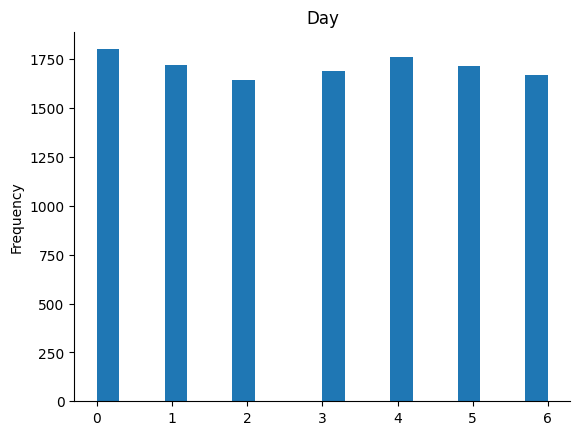

In [143]:
# Visualisaing Day, Time and Month series
# Day has no features

from matplotlib import pyplot as plt
clean_df['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 2000x600 with 0 Axes>

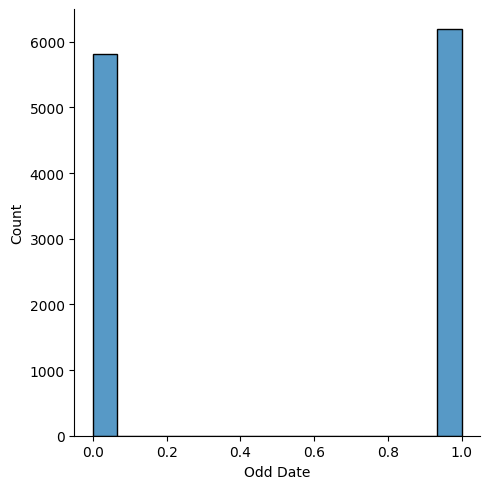

In [144]:
# Odd Date has no features

plt.figure(figsize=(20,6))
sns.displot(clean_df, x="Odd Date")
plt.show()

In [145]:
# Preprocess object date type to numerical format, 'Map Carrier' ,'Is International', 'Call Type', 'Device Battery', 'Country Prefix', 'Scam Call'

#clean_df.info()
#clean_df.describe(include='object')
#clean_df.describe()

# Dictonary for preprocess

MapCarrier = {
    'Suspicious' : 1,
    'Unlikely' : 2,
    'Very Suspicious' : 3,
}

MapInternational = {
     'Yes' : 1,
     'No' : 2,
}

MapCallType ={
    'Voip' : 1,
    'Mobile' : 2,
    'Telegram' : 3,
    'Whats App' : 4,
    'Landline' : 5,
    'WhatsApp' : 6,
}

MapDeviceBattery ={
    'Fully Charged' : 1,
    'Charging' : 2,
    'Not Charging' : 3,
}

MapCountryPrefix ={
     '95' : 1,
     '91' : 2,
     '44' : 3,
     '65' : 4,
     '60' : 5,
     '1' : 6,
     '7' : 7,
}

MapScamCall ={
  'Scam' : 1,
  'Not Scam' : 2,
}

In [146]:
MapScamCall['Scam']

1

In [147]:
clean_df['Map Carrier'] = clean_df['Flagged by Carrier'].apply(lambda x: MapCarrier[x])
clean_df['Map International'] = clean_df['Is International'].apply(lambda x: MapInternational[x])
clean_df['Map Call Type'] = clean_df['Call Type'].apply(lambda x: MapCallType[x])
clean_df['Map Device Battery'] = clean_df['Device Battery'].apply(lambda x: MapDeviceBattery[x])
clean_df['Map Country Prefix'] = clean_df['Country Prefix'].apply(lambda x: MapCountryPrefix[x])
clean_df['Map Scam Call'] = clean_df['Scam Call'].apply(lambda x: MapScamCall[x])

In [148]:
#clean_df.describe(include='object')
clean_df.describe()
clean_df.dtypes

ID                         int64
Call Duration              int64
Call Frequency             int64
Financial Loss             int64
Flagged by Carrier        object
Is International          object
Previous Contact Count     int64
Country Prefix            object
Call Type                 object
Timestamp                 object
Device Battery            object
Scam Call                 object
Date                       int32
Day                        int32
Hour                       int32
Month                      int32
Odd Date                    bool
Odd Day                     bool
Map Carrier                int64
Map International          int64
Map Call Type              int64
Map Device Battery         int64
Map Country Prefix         int64
Map Scam Call              int64
dtype: object

In [149]:
# To drop object type col[ID] from clean_df to drop_df

to_drop = ['ID','Flagged by Carrier','Is International','Country Prefix', 'Call Type','Timestamp','Device Battery', 'Scam Call', 'Odd Date', 'Odd Day']

print(to_drop)
drop_df = clean_df.drop(to_drop, axis=1)

drop_df.dtypes

['ID', 'Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Timestamp', 'Device Battery', 'Scam Call', 'Odd Date', 'Odd Day']


Call Duration             int64
Call Frequency            int64
Financial Loss            int64
Previous Contact Count    int64
Date                      int32
Day                       int32
Hour                      int32
Month                     int32
Map Carrier               int64
Map International         int64
Map Call Type             int64
Map Device Battery        int64
Map Country Prefix        int64
Map Scam Call             int64
dtype: object

In [150]:
#drop_df.corr()

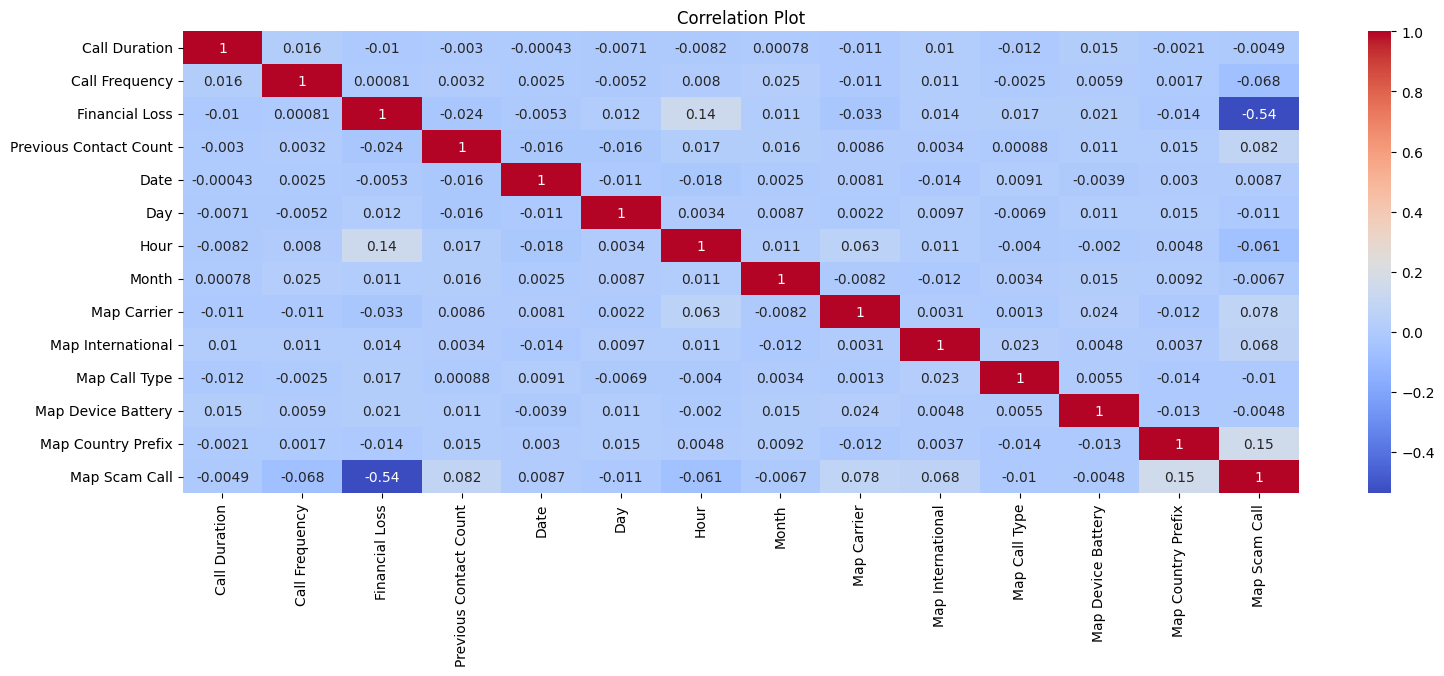

In [151]:
# Create a correlation plot
#from matplotlib import pyplot as plt

plt.figure(figsize=(18, 6))
sns.heatmap(drop_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [152]:
# Create a new table for from the transformed dataframe tcall
cursor.execute('''CREATE TABLE IF NOT Exists tcalls (
            'Call Duration' int64,
            'Call Frequency' int64,
            'Financial Loss' int64,
            'Previous Contact Count' int64,
            'Date' int32,
            'Day' int32,
            'Hour' int32,
            'Month' int32,
            'Map Carrier' int64,
            'Map International' int64,
            'Map Call' Type int64,
            'Map Device Battery' int64,
            'Map Country Prefix' int64,
            'Map Scam Call' int64
            )''')



In [153]:
# Create connection to DB
database = "calls.db"
conn = sql.connect('data/calls.db')
cursor = conn.cursor()

# Get the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
  print(table[0])

calls
tcalls


In [154]:
# Close connection
conn.close()